<a href="https://colab.research.google.com/github/tuhinibrahim/random_codes/blob/master/file_read_write.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

file_path = '/content/Case Statement - All.csv'
df = pd.read_csv(file_path)

# Show menu options
def show_menu():
    print("\nSelect an option:")
    print("1. Show all data")
    print("2. Show all column names")
    print("3. View data from a specific column")
    print("4. View a specific row")
    print("5. Search for a value in a column")
    print("6. Exit")

# Program loop
while True:
    show_menu()
    choice = input("Enter your choice (1-6): ")

    if choice == '1':
        print(df)

    elif choice == '2':
        print("Columns in the file:")
        for col in df.columns:
            print(f"- {col}")

    elif choice == '3':
        column = input("Enter the column name: ")
        if column in df.columns:
            print(df[column])
        else:
            print("Column not found.")

    elif choice == '4':
        try:
            row_index = int(input("Enter the row number (starting from 0): "))
            if 0 <= row_index < len(df):
                print(df.iloc[row_index])
            else:
                print("Row index out of range.")
        except ValueError:
            print("Please enter a valid number.")

    elif choice == '5':
        column = input("Enter the column name to search in: ")
        if column in df.columns:
            value = input("Enter the value to search for: ")
            results = df[df[column].astype(str).str.contains(value, case=False, na=False)]
            if not results.empty:
                print(results)
            else:
                print("No matching records found.")
        else:
            print("Column not found.")

    elif choice == '6':
        print("Exiting program. Goodbye!")
        break

    else:
        print("Invalid choice. Please try again.")



Select an option:
1. Show all data
2. Show all column names
3. View data from a specific column
4. View a specific row
5. Search for a value in a column
6. Exit
Enter your choice (1-6): 1
    SL             Filing Case No.      Session Number  \
0    1              C.R.- 580/2020                 NaN   
1    2                         NaN    Sess.- 1580/2021   
2    3                         NaN   Sess.- 16595/2020   
3    4                         NaN    Sess.- 3552/2022   
4    5                         NaN   Sess.- 14003/2015   
5    6              C.R.- 478/2021                 NaN   
6    7                         NaN     Sess.- 631/2021   
7    8                         NaN    Sess.- 2998/2022   
8    9                         NaN    Sess.- 1562/2021   
9   10             C.R.- 2991/2019                 NaN   
10  11            Rampura-17(12)20                 NaN   
11  12                         NaN      Sess.- 5318/17   
12  13                         NaN    Sess.- 1581/2021   

In [2]:
import pandas as pd

file_path = '/content/Case Statement - All.csv'
df = pd.read_csv(file_path)

# Show total number of rows
print(f"📋 Total Rows: {len(df)}")

# Main loop to ask for row number
while True:
    user_input = input("\nEnter a row number to view its details (or type 'exit' to quit): ")

    if user_input.lower() == 'exit':
        print("✅ Exiting the program.")
        break

    try:
        row_num = int(user_input) - 1  # Subtract 1 because DataFrame is 0-indexed
        if 0 <= row_num < len(df):
            print(f"\n📌 Details of Row {row_num + 1}:\n")
            for column in df.columns:
                print(f"{column}: {df.at[row_num, column]}")
        else:
            print("⚠️ Row number out of range. Please try again.")
    except ValueError:
        print("❌ Invalid input. Please enter a valid number.")

📋 Total Rows: 50

Enter a row number to view its details (or type 'exit' to quit): 2

📌 Details of Row 2:

SL: 2
Filing Case No.: nan
Session Number: Sess.- 1580/2021
Name of the Party: Ismail Hosen
Previous Date: 10.06.24
Previous Step: Cross
Court Name: 5th Joint District
Next Date: 18.07.24
Next Step: Cross
Remarks: Cost, Shall be deposited.
Filing Date: nan

Enter a row number to view its details (or type 'exit' to quit): 49

📌 Details of Row 49:

SL: 49
Filing Case No.: nan
Session Number: nan
Name of the Party: nan
Previous Date: nan
Previous Step: nan
Court Name: nan
Next Date: nan
Next Step: nan
Remarks: nan
Filing Date: nan

Enter a row number to view its details (or type 'exit' to quit): exit
✅ Exiting the program.


In [5]:
import pandas as pd

file_path = '/content/Case Statement - All.csv'
df = pd.read_csv(file_path)

def search_by_keyword():
    while True:
        keyword = input("\nEnter Name of the Party or Session Number (or type 'exit' to quit): ").strip().lower()
        if keyword == 'exit':
            print("✅ Exiting search.")
            break

        results = df[
            df["Name of the Party"].astype(str).str.lower().str.contains(keyword) |
            df["Filing Case No."].astype(str).str.lower().str.contains(keyword)
        ]

        if not results.empty:
            for i, row in results.iterrows():
                print(f"\n🔎 Match Found (Row {i + 1}):")
                for col in df.columns:
                    print(f"{col}: {row[col]}")
                print("-" * 50)
        else:
            print("❌ No matching records found.")

search_by_keyword()


Enter Name of the Party or Session Number (or type 'exit' to quit): 2992/2023
❌ No matching records found.

Enter Name of the Party or Session Number (or type 'exit' to quit): Ibrahim Khalil

🔎 Match Found (Row 12):
SL: 12
Filing Case No.: nan
Session Number: Sess.- 5318/17
Name of the Party: Ibrahim Khalil
Previous Date: nan
Previous Step: nan
Court Name: 7th Joint Metro.
Next Date: 03.06.24
Next Step: Argument
Remarks: nan
Filing Date: nan
--------------------------------------------------

Enter Name of the Party or Session Number (or type 'exit' to quit): BLA - 1507/2023
❌ No matching records found.

Enter Name of the Party or Session Number (or type 'exit' to quit): exit
✅ Exiting search.


In [7]:
import pandas as pd

file_path = '/content/Case Statement - All.csv'
df = pd.read_csv(file_path)

def search_by_keyword():
    while True:
        keyword = input("\nEnter Name of the Party or Filing Case No. or Session Number (or type 'exit' to quit): ").strip().lower()
        if keyword == 'exit':
            print("Exiting search.")
            break

        results = df[
            df["Name of the Party"].astype(str).str.lower().str.contains(keyword) |
            df["Filing Case No."].astype(str).str.lower().str.contains(keyword) |
            df["Session Number"].astype(str).str.lower().str.contains(keyword)
        ]

        if not results.empty:
            for i, row in results.iterrows():
                print(f"\n🔎 Match Found (Row {i + 1}):")
                for col in df.columns:
                    print(f"{col}: {row[col]}")
                print("-" * 50)
        else:
            print("\nFile not found, data not found, or file doesn't contain this data.")

search_by_keyword()


Enter Name of the Party or Filing Case No. or Session Number (or type 'exit' to quit): Ismail Hosen

🔎 Match Found (Row 2):
SL: 2
Filing Case No.: nan
Session Number: Sess.- 1580/2021
Name of the Party: Ismail Hosen
Previous Date: 10.06.24
Previous Step: Cross
Court Name: 5th Joint District
Next Date: 18.07.24
Next Step: Cross
Remarks: Cost, Shall be deposited.
Filing Date: nan
--------------------------------------------------

🔎 Match Found (Row 13):
SL: 13
Filing Case No.: nan
Session Number: Sess.- 1581/2021
Name of the Party: Ismail Hosen
Previous Date: nan
Previous Step: nan
Court Name: 5th Joint District
Next Date: 04.06.24
Next Step: Cross
Remarks: Cost
Filing Date: nan
--------------------------------------------------

Enter Name of the Party or Filing Case No. or Session Number (or type 'exit' to quit): Rakib Hasan

File not found, data not found, or file doesn't contain this data.

Enter Name of the Party or Filing Case No. or Session Number (or type 'exit' to quit): Abdul

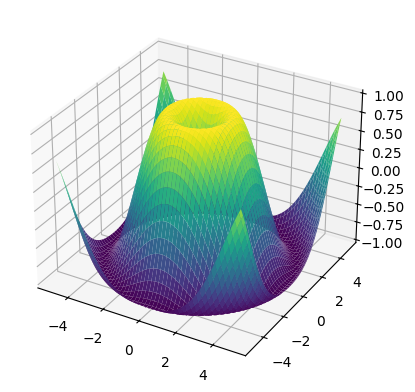

In [9]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x3d = np.linspace(-5, 5, 100)
y3d = np.linspace(-5, 5, 100)

X3D, Y3D = np.meshgrid(x3d, y3d)
Z3D = np.sin(np.sqrt(X3D**2 + Y3D**2))

ax.plot_surface(X3D, Y3D, Z3D, cmap = 'viridis')

plt.show()